In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
fc_blocksize_sweep = pd.read_csv("data/FC_blocksize_sweep.csv")

In [10]:
def create_latency_plot(file_in, x_axis, x_title, title):
    df = pd.read_csv(file_in)
    sns.lineplot(data=df, x=x_axis, y='Compute Latency')
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel("Latency")
    plt.show()

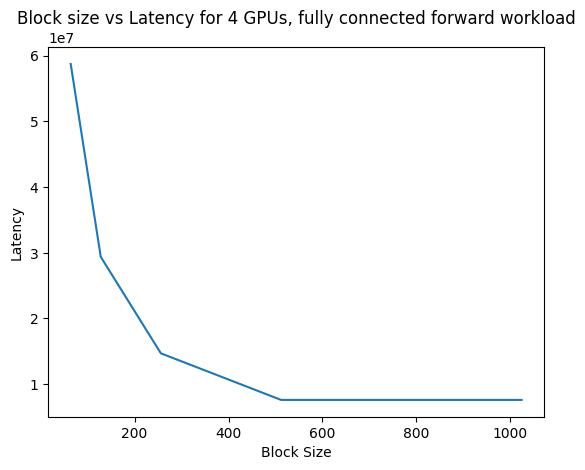

In [11]:
create_latency_plot("data/FC_blocksize_sweep.csv", "Blocksize", "Block Size", "Block size vs Latency for 4 GPUs, fully connected forward workload")

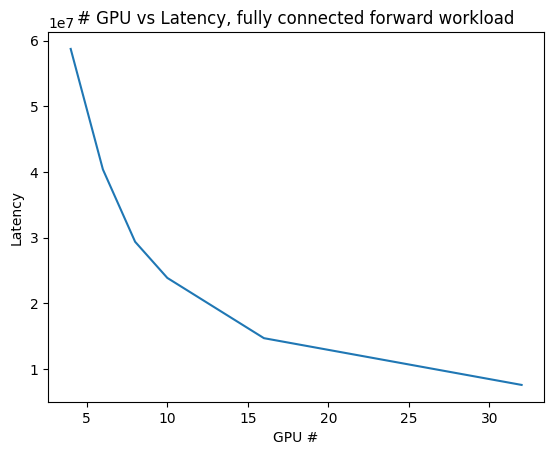

In [16]:
create_latency_plot("data/FC_GPU_num_sweep.csv", "GPU #", "GPU #", "# GPU vs Latency, fully connected forward workload")


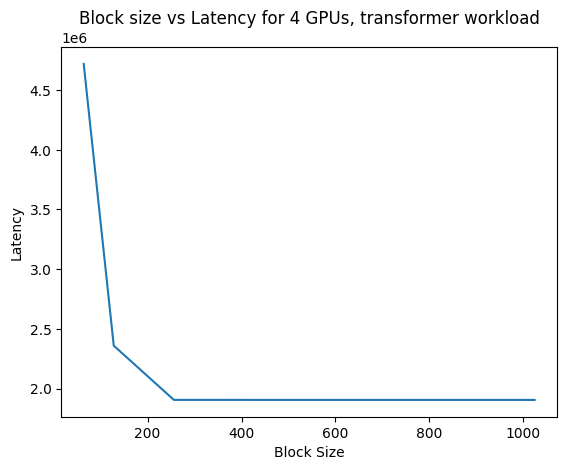

In [13]:
create_latency_plot("data/TF_blocksize_sweep.csv", "Blocksize", "Block Size", "Block size vs Latency for 4 GPUs, transformer workload")


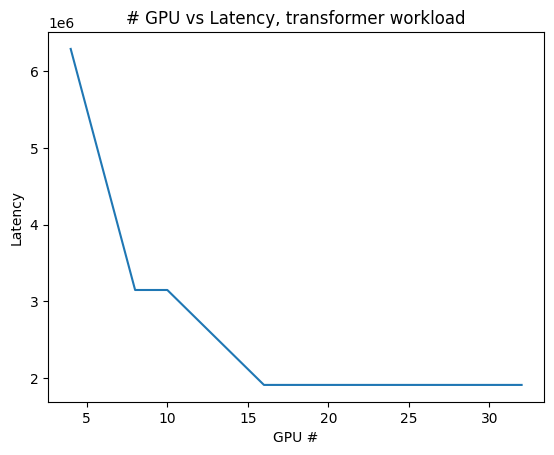

In [15]:
create_latency_plot("data/TF_GPU_num_sweep.csv", "GPU #", "GPU #", "# GPU vs Latency, transformer workload")



In [17]:
def create_energy_plot(file_in, title, index, x_title):
    df = pd.read_csv(file_in)
    df_subset = df.set_index(index)[['Global Memory Read Energy', 'Global Memory Write Energy', 'GPU Memory Read Energy', 'GPU Memory Write Energy', 'Compute Energy', 'Communication Energy']]
    df_subset.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel("Energy")
    plt.show()

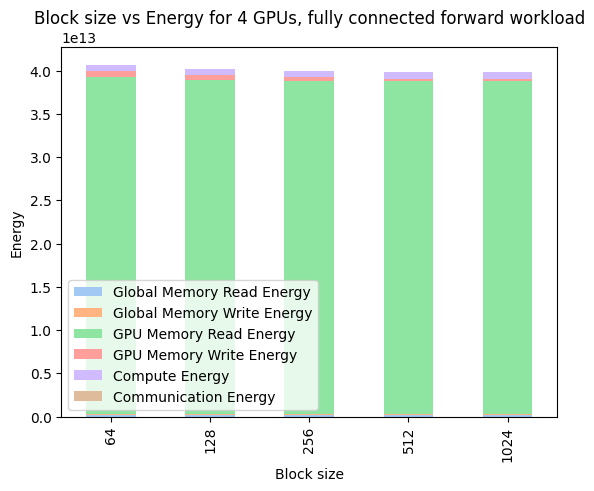

In [18]:
create_energy_plot("data/FC_blocksize_sweep.csv", "Block size vs Energy for 4 GPUs, fully connected forward workload", 'Blocksize', "Block size")

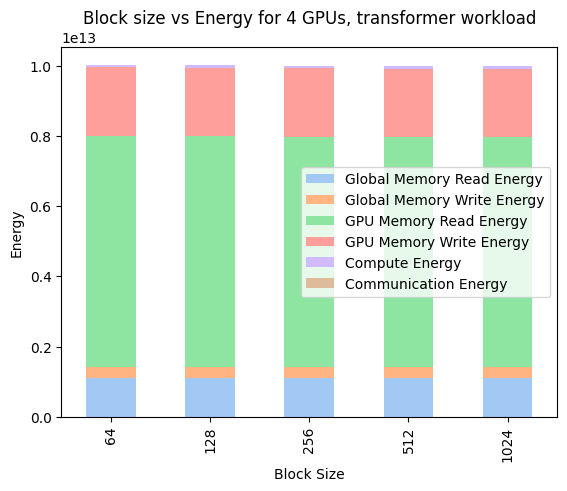

In [19]:
create_energy_plot("data/TF_blocksize_sweep.csv", "Block size vs Energy for 4 GPUs, transformer workload", 'Blocksize', 'Block Size')

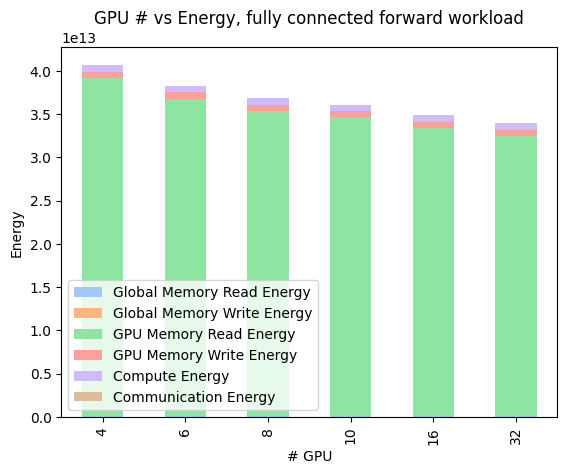

In [20]:
create_energy_plot("data/FC_GPU_num_sweep.csv", "GPU # vs Energy, fully connected forward workload", 'GPU #', "# GPU")


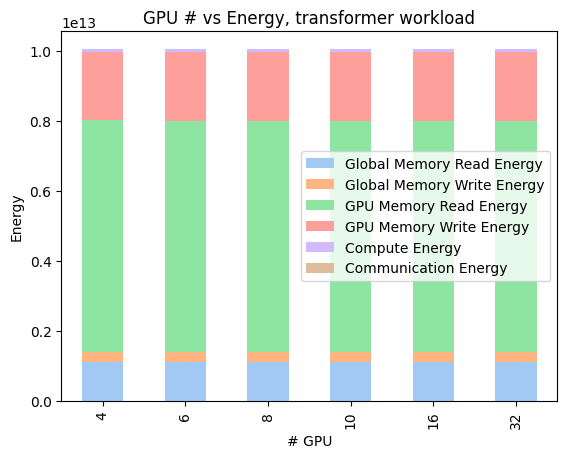

In [21]:
create_energy_plot("data/TF_GPU_num_sweep.csv", "GPU # vs Energy, transformer workload", 'GPU #', "# GPU")
